***I am going to import the dataset as well required ML models and first I will do data cleaning and check and remove null values***

In [573]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
df=pd.read_csv('/kaggle/input/coffee-sales/index.csv')
df.head(100)
# checking for null values in the dataset
null_val=df.isnull().sum()
print(null_val)
df
#In the card column there are 89 null values and we will remove these null values 

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3066,2025-02-12,2025-02-12 17:05:31.989,card,ANON-0000-0000-1200,35.76,Cappuccino
3067,2025-02-12,2025-02-12 17:42:51.484,card,ANON-0000-0000-1110,25.96,Americano
3068,2025-02-12,2025-02-12 20:05:40.740,card,ANON-0000-0000-0507,35.76,Latte
3069,2025-02-12,2025-02-12 20:23:13.374,card,ANON-0000-0000-1178,35.76,Cocoa


In [574]:
df=df.dropna()
df
#Null values have been removed 

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3066,2025-02-12,2025-02-12 17:05:31.989,card,ANON-0000-0000-1200,35.76,Cappuccino
3067,2025-02-12,2025-02-12 17:42:51.484,card,ANON-0000-0000-1110,25.96,Americano
3068,2025-02-12,2025-02-12 20:05:40.740,card,ANON-0000-0000-0507,35.76,Latte
3069,2025-02-12,2025-02-12 20:23:13.374,card,ANON-0000-0000-1178,35.76,Cocoa


****We will search for duplicate values and then we will eliminate those values****

In [575]:
df.duplicated().sum()

0

In [576]:
#Successfully converted the datetime to its correct format
df=pd.DataFrame(df)
df['datetime']=pd.to_datetime(df['datetime'])
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3066,2025-02-12,2025-02-12 17:05:31.989,card,ANON-0000-0000-1200,35.76,Cappuccino
3067,2025-02-12,2025-02-12 17:42:51.484,card,ANON-0000-0000-1110,25.96,Americano
3068,2025-02-12,2025-02-12 20:05:40.740,card,ANON-0000-0000-0507,35.76,Latte
3069,2025-02-12,2025-02-12 20:23:13.374,card,ANON-0000-0000-1178,35.76,Cocoa


In [577]:
#The coffee shop has the followig types of coffee 
print(df['coffee_name'].unique())

# We can see which customer buys how much coffee and which coffee 
customers_by_coffeeType=df.groupby(['card','coffee_name'])['coffee_name'].count()
customers_by_coffeeType

['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


card                 coffee_name        
ANON-0000-0000-0001  Latte                  17
ANON-0000-0000-0002  Hot Chocolate           2
ANON-0000-0000-0003  Americano              23
                     Americano with Milk     1
                     Cocoa                   2
                                            ..
ANON-0000-0000-1203  Americano with Milk     2
ANON-0000-0000-1204  Cocoa                   1
                     Latte                   1
ANON-0000-0000-1205  Americano               1
ANON-0000-0000-1206  Americano               1
Name: coffee_name, Length: 1626, dtype: int64

In [578]:
# We can give exclusive discounts and perks to those customers who buys more often by identifying such people
customers_by_totalMoney=df.groupby(['card','coffee_name'])['money'].transform('sum')
print(customers_by_totalMoney)
df['total_money_byCustomer']=customers_by_totalMoney

df

0        646.14
1         77.40
2         77.40
3        623.54
4         38.70
         ...   
3066     107.28
3067     207.68
3068    1332.42
3069      71.52
3070     143.04
Name: money, Length: 2982, dtype: float64


,date,datetime,cash_type,card,money,coffee_name,total_money_byCustomer
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,646.14
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,77.40
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,77.40
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,623.54
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,38.70
...,...,...,...,...,...,...,...
3066,2025-02-12,2025-02-12 17:05:31.989,card,ANON-0000-0000-1200,35.76,Cappuccino,107.28
3067,2025-02-12,2025-02-12 17:42:51.484,card,ANON-0000-0000-1110,25.96,Americano,207.68
3068,2025-02-12,2025-02-12 20:05:40.740,card,ANON-0000-0000-0507,35.76,Latte,1332.42
3069,2025-02-12,2025-02-12 20:23:13.374,card,ANON-0000-0000-1178,35.76,Cocoa,71.52


In [579]:
# We can retain our high paying customers by giving them perks and excusive discount 
# and here is the table showing who is elligible 
def perks(df):
 if df['total_money_byCustomer']> 200 :
     return 'elligible'
 else:   
     return 'not elligle'
df['elligibility_List']=df.apply(perks,axis=1)   
print(df)


 

            date                datetime cash_type                 card  \
0     2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                     ...       ...                  ...   
3066  2025-02-12 2025-02-12 17:05:31.989      card  ANON-0000-0000-1200   
3067  2025-02-12 2025-02-12 17:42:51.484      card  ANON-0000-0000-1110   
3068  2025-02-12 2025-02-12 20:05:40.740      card  ANON-0000-0000-0507   
3069  2025-02-12 2025-02-12 20:23:13.374      card  ANON-0000-0000-1178   
3070  2025-02-12 2025-02-12 21:17:04.272      card  ANON-0000-0000-1158   

      money    coffee_name  total_money_byCustomer elligibility_List  
0     38.70          Latte  

**Now we will do time-based analysis to see if we find any patterns so that we can manage the usage of ingridients effectively and wisely and to reduce over buying ingridients reducing the cost and save money**

In [580]:
#df['year'] = df['date_time'].dt.year
#df['month'] = df['date_time'].dt.month
#df['day'] = df['date_time'].dt.day
#df['hour'] = df['date_time'].dt.hour
#df['minute'] = df['date_time'].dt.minute
#df['weekday'] = df['date_time'].dt.day_name()


In [581]:


df=df.drop('date',axis=1)
df
df['M']=df['datetime']
df

,datetime,cash_type,card,money,coffee_name,total_money_byCustomer,elligibility_List,M
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,646.14,elligible,2024-03-01 10:15:50.520
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,77.40,not elligle,2024-03-01 12:19:22.539
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,77.40,not elligle,2024-03-01 12:20:18.089
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,623.54,elligible,2024-03-01 13:46:33.006
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,38.70,not elligle,2024-03-01 13:48:14.626
...,...,...,...,...,...,...,...,...
3066,2025-02-12 17:05:31.989,card,ANON-0000-0000-1200,35.76,Cappuccino,107.28,not elligle,2025-02-12 17:05:31.989
3067,2025-02-12 17:42:51.484,card,ANON-0000-0000-1110,25.96,Americano,207.68,elligible,2025-02-12 17:42:51.484
3068,2025-02-12 20:05:40.740,card,ANON-0000-0000-0507,35.76,Latte,1332.42,elligible,2025-02-12 20:05:40.740
3069,2025-02-12 20:23:13.374,card,ANON-0000-0000-1178,35.76,Cocoa,71.52,not elligle,2025-02-12 20:23:13.374


In [582]:
#Now we are converting the time into days to see daily trends 

df['datetime']=pd.to_datetime(df['datetime'])
df['datetime']=pd.DataFrame(df['datetime'])
days_column=df['datetime'].dt.day_name()
df['datetime']=days_column
df['datetime']
df

,datetime,cash_type,card,money,coffee_name,total_money_byCustomer,elligibility_List,M
0,Friday,card,ANON-0000-0000-0001,38.70,Latte,646.14,elligible,2024-03-01 10:15:50.520
1,Friday,card,ANON-0000-0000-0002,38.70,Hot Chocolate,77.40,not elligle,2024-03-01 12:19:22.539
2,Friday,card,ANON-0000-0000-0002,38.70,Hot Chocolate,77.40,not elligle,2024-03-01 12:20:18.089
3,Friday,card,ANON-0000-0000-0003,28.90,Americano,623.54,elligible,2024-03-01 13:46:33.006
4,Friday,card,ANON-0000-0000-0004,38.70,Latte,38.70,not elligle,2024-03-01 13:48:14.626
...,...,...,...,...,...,...,...,...
3066,Wednesday,card,ANON-0000-0000-1200,35.76,Cappuccino,107.28,not elligle,2025-02-12 17:05:31.989
3067,Wednesday,card,ANON-0000-0000-1110,25.96,Americano,207.68,elligible,2025-02-12 17:42:51.484
3068,Wednesday,card,ANON-0000-0000-0507,35.76,Latte,1332.42,elligible,2025-02-12 20:05:40.740
3069,Wednesday,card,ANON-0000-0000-1178,35.76,Cocoa,71.52,not elligle,2025-02-12 20:23:13.374


coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
datetime                                                                  
Friday              62                   90          48     42       37   
Monday              69                  110          62     24       35   
Saturday            54                  104          60     22       56   
Sunday              36                   88          65     19       42   
Thursday            52                   86          60     15       41   
Tuesday             55                  130          57     43       44   
Wednesday           57                  102          59     17       29   

coffee_name  Espresso  Hot Chocolate  Latte  
datetime                                     
Friday             16             38     84  
Monday              8             25    117  
Saturday           12             20     93  
Sunday             15             36     77  
Thursday           21             44     96  
Tu

<Axes: ylabel='datetime'>

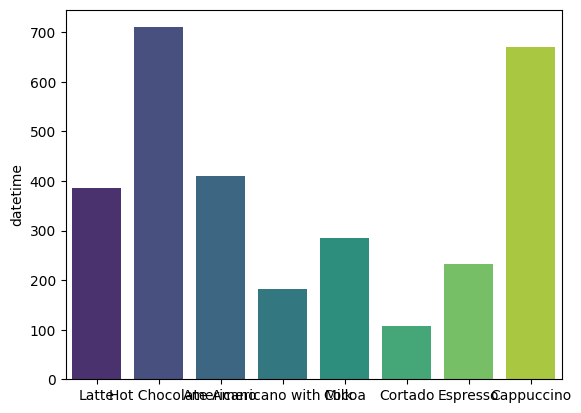

In [583]:
#It would be usefull to see which day brings more revenue and which coffee people prefer on each day
avg_dailySales=df.groupby(['datetime','coffee_name'])['datetime'].count().unstack()
print(avg_dailySales)
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=df['coffee_name'].unique(),y=df.groupby('coffee_name')['datetime'].count(),palette='viridis')

***Moving forvard we are going to analyze monthly trends throughout the year to see how much we have grew***

In [584]:
monthlySales=pd.to_datetime(df['M'])
monthlySales=monthlySales.dt.strftime('%B')
df['M']=monthlySales
df

,datetime,cash_type,card,money,coffee_name,total_money_byCustomer,elligibility_List,M
0,Friday,card,ANON-0000-0000-0001,38.70,Latte,646.14,elligible,March
1,Friday,card,ANON-0000-0000-0002,38.70,Hot Chocolate,77.40,not elligle,March
2,Friday,card,ANON-0000-0000-0002,38.70,Hot Chocolate,77.40,not elligle,March
3,Friday,card,ANON-0000-0000-0003,28.90,Americano,623.54,elligible,March
4,Friday,card,ANON-0000-0000-0004,38.70,Latte,38.70,not elligle,March
...,...,...,...,...,...,...,...,...
3066,Wednesday,card,ANON-0000-0000-1200,35.76,Cappuccino,107.28,not elligle,February
3067,Wednesday,card,ANON-0000-0000-1110,25.96,Americano,207.68,elligible,February
3068,Wednesday,card,ANON-0000-0000-0507,35.76,Latte,1332.42,elligible,February
3069,Wednesday,card,ANON-0000-0000-1178,35.76,Cocoa,71.52,not elligle,February


In [585]:
#Now we are starting our monhtly analysis

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df['M']=pd.Categorical(df['M'],categories=month_order,ordered=True)
df=df.sort_values('M')
df
monthly_revenue = df.groupby('M')['money'].sum()
monthly_revenue

<ipython-input-585-295f3a5ff5c5>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = df.groupby('M')['money'].sum()


M
January       6398.86
February      5589.62
March         5905.20
April         5719.56
May           8164.42
June          7617.76
July          6915.94
August        7613.84
September     9988.64
October      13891.16
November      8590.54
December      8237.74
Name: money, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: title={'center': 'MONTHLT SALES'}, ylabel='money'>

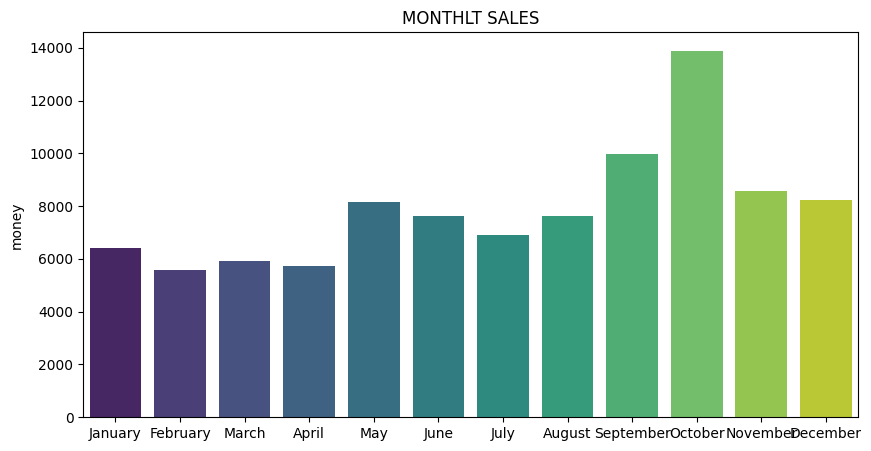

In [586]:
import matplotlib.pyplot as plt 
import seaborn as sns 

a=pd.Series(monthly_revenue)

m=df['M'].unique()
plt.figure(figsize=(10, 5))

plt.bar(m, a, color='purple')  # Change color if needed
plt.title('MONTHLT SALES')
sns.barplot(x=m,y=a,palette='viridis')
